In [1]:
import pandas as pd

user = pd.read_csv('data/custom_data.csv')
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


오히려 데이터의 차원이 너무 많아지면 분석의 정확도가 떨어지는 경우도 있습니다. 이런 현상을 차원의 저주라고 합니다.  
차원의 저주가 발생하는 상황을 직접 확인하기 위해 user 데이터의 클러스터링 결과를 차원의 수에 따라 비교해 보겠습니다. 클러스터링에는 k-means 방법을 사용합니다.  
먼저, 6차원 데이터로 클러스터 개수 k를 1부터 9까지 바꿔가며 모델을 학습시킨 결과의 성능 지표인 inertia를 시각화한 그래프입니다.

C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

<Axes: >

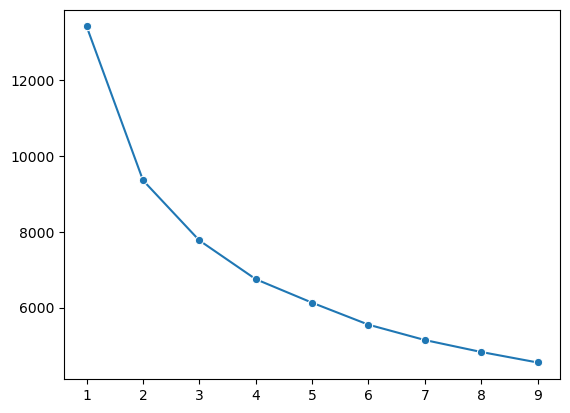

In [2]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# 데이터 스케일링
user_mean = user.mean()  # 각 컬럼의 평균값
user_std = user.std()    # 각 컬럼의 표준편차
scaled_df = (user - user_mean)/user_std  # 컬럼별 표준화 진행 

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

다음으로, 6개의 차원을 2개 차원 축소시킨 후에 다시 k-means를 적용해 보겠습니다.  
PCA: 고차원의 데이터를 저차원으로 바꾸는 데 사용되는 방법이라는 것

C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

<Axes: >

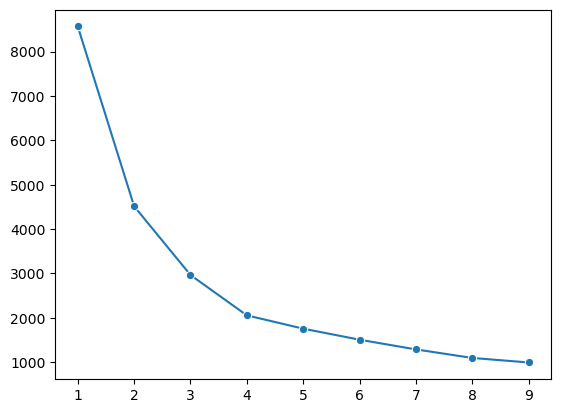

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  #n_components : 유지할 차원의 갯수

# PCA 적용
pca.fit(scaled_df)
scaled_df_pca = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pca)

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

두 그래프를 비교해 보면, 차원이 2개인 데이터로 클러스터링 한 결과가 차원이 6개인 데이터로 클러스터링 한 결과보다 모든 클러스터 개수 k에서 inertia 값이 작은 것을 알 수 있습니다. 즉, 차원의 개수가 더 작을수록 클러스터링의 결과로 모인 데이터들이 더 많이 유사하고, 성능이 좋게 나오는 것이죠.

차원의 저주를 해결하는 대표적인 방법으로 차원 축소(Dimensionality Reduction)가 있습니다. 차원 축소란, 데이터에 있는 차원(변수)의 숫자를 줄여서 차원의 저주 문제를 해결하는 기법인데요. 이전 레슨에서 6개 변수로 된 데이터를 2개 변수로 줄여서 k-means를 한 것도 모델의 성능을 좀 더 좋게 하기 위하여 차원 축소가 활용된 것입니다.

차원 축소에는 크게 두 가지 접근법이 있습니다.

### 차원 선택  

첫 번째는 전체 차원 중 의미 있다고 판단되는 것들만 선택해서 사용하는 차원 선택이란 방법입니다. 차원 선택 적용할 때는 변수 중 무엇이 중요한지, 의미상 중복되는 것들이 있는지 등을 확인해야 합니다. 이전 레슨에서 활용한 user 데이터를 예시로 차원 선택을 해봅시다.


In [4]:
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


생각해 보면 자녀가 있는 집은 그렇지 않은 집보다 가족 구성원 수가 좀 더 많겠죠? 이렇게 의미상 중복이 되는 경우에는 두 변수 중 하나를 제거하여 차원을 줄일 수 있습니다. children이라는 변수를 제거해 볼게요.

In [5]:
user = user.drop('children', axis = 1)
user.head(10)

,recency,age,spent_all,purchase_num_all,family_size
0,58,66,1617,25,1
1,38,69,27,6,3
2,26,58,776,21,2
3,26,39,53,8,3
4,94,42,422,19,3
5,16,56,716,22,3
6,34,52,590,21,2
7,32,38,169,10,3
8,19,49,46,6,3
9,68,73,49,2,4


예시에서는 대략적으로 변수 간 의미를 통해 탈락시킬 변수를 선택했는데요. 실제로는 변수 간의 관계를 면밀히 확인하여 제거할 변수를 판단해야 합니다. 이렇게, 변수들 간의 관계를 통해 덜 중요하거나 불필요한 변수를 찾아 데이터에서 빼는 작업을 차원 선택이라고 합니다.

차원 선택의 가장 큰 장점은 사용이 쉽다는 점입니다. 단순히 제거할 변수를 직관적으로 판단하고 선택하면 되기 때문에 쉽고 빠르게 적용할 수 있습니다. 또한, 각 변수들의 특성이 유지되면서 차원을 줄이기 때문에 결과를 이해하고 해석하기 쉽다는 장점도 있습니다.

하지만, 단점도 있습니다. 바로, 정보 손실이 커진다는 점인데요. 데이터에서 탈락시킨 변수들은 분명 이유가 있겠지만, 그래도 전체 데이터에서 해당 변수만으로 설명되는 정보가 분명 존재할 수 있습니다. 위의 예시에서도 children과 family_size는 분명 중복되는 의미가 크지만, 그렇다고 children이라는 변수를 그냥 데이터에서 제거하게 되면 해당 변수가 가지는 고유의 정보인 자녀 숫자에 대한 정보는 사라지게 되는 것이죠.

### 차원 추출  

차원 추출은 데이터를 가장 잘 설명하는 차원을 새롭게 생성하여 차원을 줄이는 방법입니다. 다른 말로 표현해 보면, 여러 변수의 특징을 종합적으로 잘 나타내는 새로운 변수를 찾아내 변수를 통합하여 차원을 줄이는 방법이죠. 차원 선택과 달리 데이터를 설명하는 데 필요한 정보를 최대한 보존하기 때문에, 차원 선택으로 뽑은 변수들로만 분석을 할 때보다 상대적으로 더 나은 성능을 보입니다.

하지만, 여러 변수의 특징을 대표하기 위해 만들어진 새로운 변수가 정확하게 무엇을 의미하는 것인지 해석하기 어렵다는 단점이 있습니다. 만약에 children과 family_size라는 변수로 새로운 변수 PC1을 추출했다면, 해당 변수가 무엇을 의미하는 것인지 이해하는 게 어려워질 수 있는 거죠. 그리고, 여러 변수를 대표하기 위한 새로운 변수를 생성하는 과정에서 데이터 간의 분산이나 거리를 계산하는 등 추가적인 연산을 해야 하므로 계산 비용이 증가한다는 단점도 있습니다.

차원 선택과 차원 추출은 각각의 장단점이 있기 때문에 상황에 따라 적절한 방법을 선택하여 사용해야 하는데요. 일단 이번 토픽에서는 차원 추출 그중에서도 가장 널리 사용하는 PCA(Principal Component Analysis)에 대한 내용을 위주로 학습해 볼게요. 차원 선택을 위한 기법들은 이후 머신러닝 토픽들에서 관련 내용이 나올 때마다 따로 다루겠습니다.

PCA(Principal Component Analysis)는 대표적인 차원 축소 기법 중 하나입니다. 여러 차원들의 특징을 가장 잘 설명해 주는 차원인 주성분(Principal Component)을 이용하여 차원을 축소하는 방법인데요.

### PCA의 동작 과정  

#### 데이터 표준화 및 원점 이동

먼저, PCA를 하기 위해선 데이터의 단위를 통일해야 합니다. 예시에서, 키를 표시한 단위는 m이고, 신발의 단위는 mm인데요. 이렇게 변수의 단위가 다르면 두 변수의 영향이 PCA 결과에 고르게 반영되는 것이 아니라, 상대적으로 큰 값이 들어간 변수의 영향이 더 많이 반영됩니다. 예를 들어서, 위 예시에서는 신발 사이즈가 키보다 실제로는 작은 값이지만 숫자 자체는 더 크기 때문에 결과에는 더 큰 영향을 미칠 수 있게 됩니다.

따라서, PCA를 적용하기 전에는 반드시 변수 간 단위를 통일해 주는 과정이 필요합니다. 보통은 데이터의 값을 평균에서 빼서 표준편차로 나눠주는 표준화를 사용합니다.  

데이터를 표준화하면 단순히 변수의 단위만 통일되는 것이 아니라 데이터의 중심 지점이 원점이 되도록 위치가 이동되는 효과가 있습니다.

#### 주성분 찾기

다음으로, 두 개의 차원(키, 신발 사이즈)으로 표현되는 데이터들을 가장 잘 설명해 주는 주성분을 찾아야 합니다. 주성분은 데이터들의 중심(원점)을 지나면서 모든 데이터들에서의 수직 거리의 합이 가장 가깝도록 하는 선인데요.  

다음으로, 두 번째 주성분을 찾아볼게요. 참고로, n차원의 데이터에서는 총 n개의 주성분이 존재할 수 있습니다. 저희가 살펴보는 예시는 변수가 2개인 2차원의 데이터였죠? 따라서, 위의 예시에서는 두 번째 주성분을 찾아서 그릴 수 있습니다.

두 번째 주성분은 첫 번째로 찾은 메인 주성분에 수직이면서 원점을 지나고, 데이터들과의 거리 합이 가장 작은 선을 찾으면 됩니다.

#### 데이터 투영하기

이제, 찾아진 주성분으로 데이터를 투영(Projection)합니다. 투영이란, 쉽게 얘기해서 데이터들을 주성분 위로 옮기는 과정을 의미합니다. 투영을 하면 모든 데이터들은 주성분 위에 위치하게 됩니다.  

#### 새로운 축 기준으로 데이터 회전하기

마지막으로, 새롭게 만들어진 변수인 첫 번째 주성분(PC1)과 두 번째 주성분(PC2)이 각각 x축과 y축이 될 수 있도록 축과 데이터 전체를 회전시킵니다. 그러면 데이터들의 분포도 함께 변하게 되는데요.  

이제, 키와 신발 사이즈라는 2개의 변수는 사라지고, PC1과 PC2라는 새로운 변수로 데이터를 표현할 수 있게 되었습니다. PC1과 PC2가 각각 무엇인지는 모르지만, 그래도 해당 축이 데이터의 특성을 가장 잘 설명한다고 할 수 있는 축이 찾아진 것이죠.

이렇게 주성분이 찾아지면, 차원을 축소하는 것은 쉽습니다. 만약에 2차원인 데이터를 1차원으로 줄이고 싶다면 PC1만을 사용해서 데이터를 나타내면 됩니다.  

만약에 2차원으로 나타내려면 PC1과 PC2 두 개의 축으로 이루어진 좌표 평면에 데이터들을 표현하면 됩니다.

### 주성분 찾는 방법

PCA는 고차원 데이터의 특성을 최대한 잘 반영하는 축인 주성분을 찾아서 데이터를 저차원으로 투영하는 방법이라고 했습니다. 이때, 주성분은 어떻게 찾을 수 있을까요? 데이터들의 중심(원점)을 지나면서 모든 데이터들에서의 수직 거리의 합이 가장 가깝도록 하는 선을 찾으면 된다.  

주어진 데이터의 특징을 나타내면서 원점을 지나는 선은 정말 많습니다. 어떠한 선도 데이터의 특성을 일부 설명해 줄 수 있는 것이죠. 하지만, 그중에서도 가장 데이터의 특성을 잘 나타내는 선은 하나입니다. 그리고, 그 하나의 선을 찾는 기준은 모든 데이터와 찾아진 선 사이의 거리 합이 가장 작아지도록 하는 것입니다.  

원래 데이터가 분포한 형태와 가장 비슷하게 퍼져있도록 데이터가 투영되었으니까요. 이렇게, 데이터와 성분 사이의 수직 거리가 더 가까울수록 해당 축이 데이터의 분포를 잘 반영하게 됩니다.  

그리고, 데이터와 주성분 사이의 거리가 최소가 되도록 선을 찾으면 주성분으로 데이터들을 투영했을 때 해당 데이터가 퍼져있는 정도, 즉 분산이 커집니다. 그 이유는 피타고라스의 정의를 기준으로 생각하면 쉽게 이해할 수 있는데요. 데이터와 원점 사이의 거리인 C는 고정이기 때문에, 삼각형의 높이 부분에 해당하는 데이터와 선 사이의 거리(B)가 작아지면 선의 길이, 즉 분산(A)이 늘어나는 형태인 것이죠.  

즉, PCA에서 데이터의 특징을 가장 잘 설명하는 주성분을 찾는 것은 데이터들과 선 사이의 수직 거리 합이 최소가 되는 선을 찾으면 되는 것이고, 그것은 곧 임의의 선에 데이터를 투영했을 때 데이터들의 분산이 최대가 되는 선을 찾는 것과 같은 문제가 되는 것입니다. 데이터들의 분산이 최대가 되도록 하는 선이 데이터에 대한 설명력이 가장 높은 선이 되는 것이죠. 실제로 PCA 연산에서는 투영하였을 때 데이터들 사이의 분산이 최대가 되도록 하는 선을 찾는 방식으로 주성분을 찾습니다.  

다음으로, 두 번째 주성분은 첫 번째로 찾은 메인 주성분에 수직이면서 원점을 지나고, 데이터들과의 거리 합이 가장 작은 선을 찾으면 됩니다.  

주성분끼리 수직으로 직교하게 하는 이유는 새롭게 찾아지는 두 축이 서로 상관이 없도록 하여 조금 더 많은 정보를 살린 상태로 차원을 축소하기 위함입니다.  

In [6]:
from sklearn.decomposition import PCA

# 모델 생성
pca = PCA(n_components=2)  # n_components: PCA를 통해 차원을 몇 개로 축소할 것인지

In [7]:
pca.fit(scaled_df)  # PCA 학습
scaled_df_pca = pca.transform(scaled_df)  # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_df_pca)  # 데이터프레임으로 변환

pca_df.columns = ['PC1', 'PC2']  # 데이터프레임 컬럼 이름 지정

pca_df.head()

,PC1,PC2
0,-3.043476,0.646301
1,1.926976,0.528713
2,-1.501383,-0.117994
3,1.168100,-1.373146
4,0.226542,-0.077045


<Axes: xlabel='PC1', ylabel='PC2'>

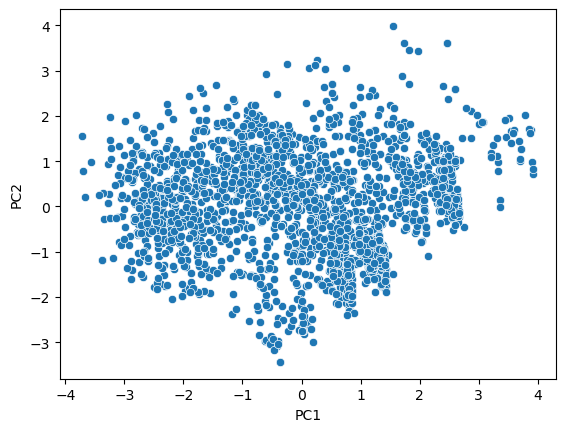

In [8]:
sns.scatterplot(data=pca_df, x ='PC1', y='PC2')

In [9]:
pca = PCA(n_components = 6)
pca.fit(scaled_df)  # PCA 학습
scaled_df_pc = pca.transform(scaled_df)  # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_df_pc)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.043476,0.646301,-0.249843,0.704499,-0.066913,0.376684
1,1.926976,0.528713,0.431355,1.255031,0.085687,0.642017
2,-1.501383,-0.117994,0.800846,0.379732,-0.367393,-0.553751
3,1.168100,-1.373146,0.668054,-0.608071,0.036437,-0.285106
4,0.226542,-0.077045,-1.553274,-1.107927,-0.463466,-0.381861


이젠 6개의 PC가 각각 전체 데이터에 대해서 어느 정도의 설명력을 가지는지, 즉 전체 분산 대비 어느 정도의 분산 비율을 가지는지 확인해 보겠습니다. 각 주성분의 분산 비율을 계산하기 위해서는 scikit-learn의 PCA에 있는 explained_variance_ratio_ 속성을 활용하면 됩니다.

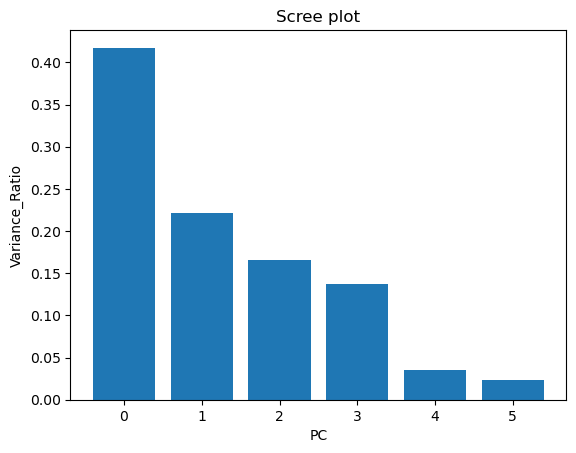

In [10]:
import numpy as np

# PCA 개수
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_ 

plt.bar(x, var) # Bar plot 그리기

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.show()

주성분 1(PC1)은 전체 주성분이 설명해 주는 데이터의 특성 대비 약 40% 정도를 설명하고, 주성분 2(PC2)는 약 20% 정도를 설명하고 있네요.

플롯의 결과를 바탕으로 최적의 주성분 개수를 구해야 하는데요. 기준은 간단합니다. 바로, PC1부터 PC_N까지 분산 비율의 합을 누적했을 때 전체 대비 70% 이상이 되는 PC_N을 고르면 됩니다. 그래도 전체 분산 대비 분산 비율이 70%는 되어야 원본 데이터가 충분히 설명된다고 보는 거죠.

In [11]:
cum_var = np.cumsum(var)   # 누적 분산비율 구하기
cum_vars = pd.DataFrame({'cum_vars': cum_var}, index = pca_df.columns)

cum_vars

,cum_vars
PC1,0.417326
PC2,0.638633
PC3,0.804805
PC4,0.941612
PC5,0.976473
PC6,1.000000


결과를 확인하니 3개의 주성분(PC1, PC2, PC3)이 있을 때 전체 주성분이 데이터를 설명하는 정도 대비 약 80% 정도를 설명하는 것으로 나옵니다. 즉, 해당 경우에는 주성분을 3개로 차원을 축소하는 게 적절하다고 할 수 있죠.

물론, 70%가 절대적인 기준은 아닙니다. 데이터의 복잡성과 분석 목적에 따라 충분히 달라질 수 있죠. 예를 들어, 데이터가 상대적으로 단순하면 70% 이상의 누적 설명력을 충족하는 주성분 개수를 선택하는 것으로 충분할 수 있습니다. 반면에, 데이터가 복잡하고 누적 설명력이 높아야 하는 경우에는 80% 이상, 혹은 더 높은 누적 설명력을 가지는 주성분 개수를 선택해야 할 수도 있습니다. 또한, 분석의 목적 상 차원이 높은 데이터를 시각화하여 데이터의 특징을 파악하는 게 필요할 수도 있는데요. 그럴 경우에는 Scree plot의 결과와 상관없이 차원을 2개 또는 3개로 축소시키기도 합니다.

### PCA 특징

PCA만이 가지는 가장 대표적인 특성은 데이터가 가진 중요한 정보를 최대한 보존하면서 차원을 축소한다는 점입니다.

In [13]:
user = pd.read_csv('data/custom_data.csv')
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


PCA로 6차원을 2차원으로 축소시킬 경우, 새롭게 찾아진 두 개의 변수 PC1과 PC2는 6개 변수가 가진 정보를 종합적으로 고려하여 찾아진 변수이기 때문에 여러 변수들의 정보 손실을 최소화할 수 있습니다. 아래 예시만 봐도, 2개의 주성분으로 차원을 줄였을 때 기존 6개 변수가 가진 정보 중 약 65%가량이 보존된다는 것을 알 수 있죠.

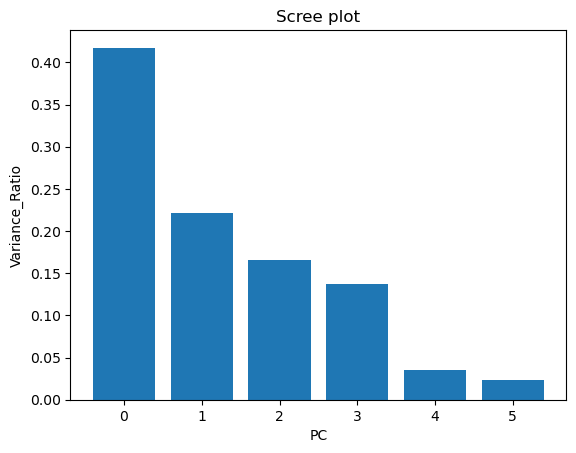

In [14]:
# 데이터 스케일링
user_mean = user.mean()
user_std = user.std()
scaled_df = (user - user_mean)/user_std

# PCA
pca = PCA(n_components = 6)
pca.fit(scaled_df)
scaled_df_pc = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pc)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

# 주성분의 설명력 확인
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_ 

plt.bar(x, var)  # Bar plot 그리기

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.savefig('img5.png', dpi=300)
plt.show()

이렇게 변수가 가진 정보를 최대한 보존하는 방식으로 차원을 줄인다는 것이 PCA의 가장 큰 장점입니다. 데이터가 가진 변수의 정보를 잘 보존해 주기 때문에 PCA를 통해 차원을 축소시킨 데이터를 활용하여 예측 모델을 학습시키면 더 정확하고 일반화된 결과물을 얻을 수 있습니다.

하지만, 단점도 있습니다. 먼저, PCA의 결과로 찾아진 주성분의 의미를 해석하는 것이 어렵습니다. 주성분은 변수들 안에 포함된 여러 정보를 종합적으로 고려하여 새롭게 추출된 차원인데요. 하나의 주성분이 하나의 변수와 매칭되는 것이 아니라 여러 변수의 영향력을 종합적으로 받고 있기 때문에 결과로 확인된 주성분이 무엇을 의미하는지 명확하게 정의하기가 어렵습니다.

또한, PCA는 거의 모든 데이터의 정보를 최대한 유지하는 방향으로 주성분을 추출해 주는데요. 해당 과정에 많은 연산이 필요합니다. 즉, 차원이 더 높은 데이터를 축소시킬수록 계산 비용이 급격히 증가되며 연산 시간이 오래 걸린다는 문제가 있죠. 따라서, PCA를 사용하기 전에는 데이터의 차원과 크기, 연산 환경을 고려하는 것이 필요하다는 단점이 있습니다.

### PCA와 k-means 클러스터링

In [15]:
credit_df1 = pd.read_csv('data/CC_GENERAL.csv')
credit_df1.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


CC_GENERAL는 신용 카드 사용자 정보와 해당 사용자가 발급한 신용 카드 정보를 나타내는 데이터 세트입니다. 해당 데이터 세트는 은행에서 제공하는 고객 정보와 신용 카드 사용 내역을 바탕으로 구성되어 있는데요. 각 열이 나타내는 정보는 아래와 같습니다.

> 고객 정보
- CUST_ID: 고객 아이디
- 잔액 관련 컬럼
- BALANCE: 현재 잔액
- BALANCE_FREQUENCY: 잔액 갱신 빈도

> 구매 관련 컬럼
- PURCHASES: 총 구매 금액
- ONEOFF_PURCHASES: 일시불 구매 금액
- INSTALLMENTS_PURCHASES: 할부 구매 금액
- PURCHASES_FREQUENCY: 구매 빈도
- ONEOFF_PURCHASES_FREQUENCY: 일시불 구매 빈도
- PURCHASES_INSTALLMENTS_FREQUENCY: 할부 구매 빈도
- PURCHASES_TRX: 총 구매 거래 횟수

> 현금 서비스 관련 컬럼
- CASH_ADVANCE: 현금 서비스에 대한 금액
- CASH_ADVANCE_FREQUENCY: 현금 서비스 빈도
- CASH_ADVANCE_TRX: 현금 서비스 거래 횟수

> 신용 한도 관련 컬럼
- CREDIT_LIMIT: 신용 한도
- 지불 관련 컬럼
- PAYMENTS: 총 지불 금액
- MINIMUM_PAYMENTS: 최소 지불 금액
- PRC_FULL_PAYMENT: 전액 지불 비율

In [16]:
# 데이터 표준화
credit_df2 = credit_df1.drop('CUST_ID', axis = 1)

credit_df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [17]:
scaled_credit_df2 = (credit_df2 - credit_df2.mean()) / credit_df2.std()  # 컬럼별 표준화 진행

In [18]:
# PCA
X = scaled_credit_df2.copy()

# 객체
pca = PCA(n_components=2)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df.head()

,0,1
0,-1.682126,-1.076391
1,-1.138231,2.506336
2,0.969630,-0.383498
3,-0.873579,0.043163
4,-1.599344,-0.688542


C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

<Axes: >

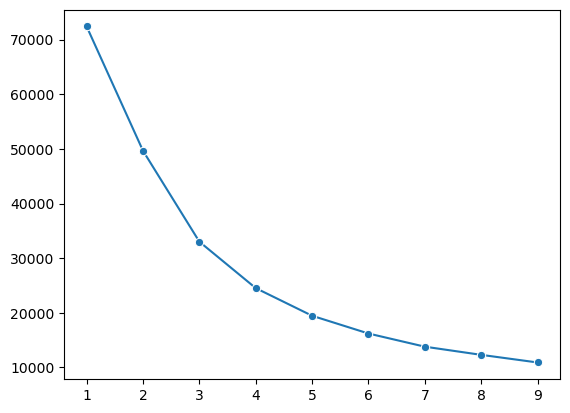

In [19]:
# k-means 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

#시각화
sns.lineplot(x=ks, y=inertias, marker='o')

그래프의 기울기를 확인해 보니, k의 값이 6일 때부터 inertia 값의 감소폭이 작아지는 것 같네요. 따라서, k를 6으로 지정한 후에 k-means를 해주겠습니다. 클러스터링을 해 준 후에는 시각화까지 해서 데이터들의 특징을 살펴보도록 할게요.

C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='PC1', ylabel='PC2'>

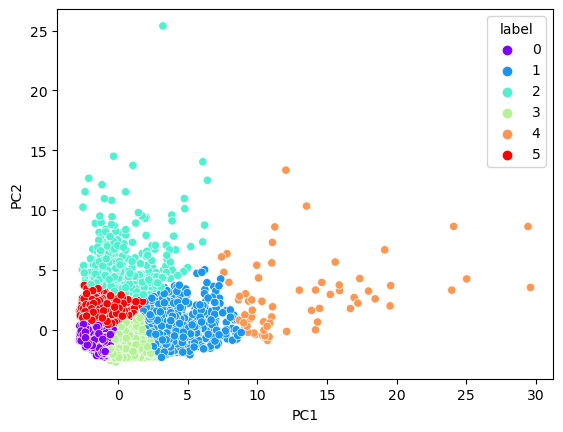

In [20]:
model = KMeans(n_clusters=6)
model.fit(pca_df)
labels = model.labels_  # 고객마다 부여할 클러스터
x, y = pca_df[0], pca_df[1]

# PCA 진행한 데이터프레임에 클러스터 번호 부여
pca_km_df = pd.DataFrame({'PC1': x, 'PC2':y, 'label':labels})

# 시각화
sns.scatterplot(data=pca_km_df, x='PC1', y='PC2', hue='label', palette='rainbow')

클러스터 3과 4에 속한 고객들이 가장 많이 흩어져 있으며 나머지 클러스터에 속한 고객들은 상대적으로 유사한 특징을 가지고 있는 게 보이네요.

In [21]:
# k = 6인 k-means 클러스터링 진행
model = KMeans(n_clusters=6, random_state = 111)
model.fit(pca_df)

labels=model.labels_  #고객마다 부여할 클러스터

# 원본 데이터에 클러스터 부여
credit_df1['cluster'] = labels

C:\Users\youji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
credit_df1['CUST_ID'].groupby(credit_df1['cluster']).count()

cluster
0    2896
1      81
2     969
3    2908
4    1622
5     474
Name: CUST_ID, dtype: int64

그렇다면 클러스터에 따라 각 열의 값에는 어떠한 차이가 있을까요? 열이 많기 때문에 편의를 위해 행과 열을 바꿔서 출력해 볼게요. 참고로, .T를 사용하면 결과의 행과 열을 바꿔줄 수 있습니다.

In [23]:
credit_df1.groupby(credit_df1['cluster']).mean().T

C:\Users\youji\AppData\Local\Temp\ipykernel_5432\1524968031.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  credit_df1.groupby(credit_df1['cluster']).mean().T


cluster,0,1,2,3,4,5
BALANCE,645.953147,5009.786942,2306.689732,722.881272,2774.363054,6093.330568
BALANCE_FREQUENCY,0.901135,0.978563,0.983941,0.760674,0.945562,0.977721
PURCHASES,933.766395,15733.773333,3754.430485,216.072572,253.899778,679.013755
ONEOFF_PURCHASES,425.854044,10545.125926,2343.754530,156.308893,174.879982,433.726224
INSTALLMENTS_PURCHASES,508.144910,5188.647407,1411.295150,60.207101,79.054766,245.428776
CASH_ADVANCE,104.901009,1095.419795,491.818116,349.373062,2275.149616,6720.533409
PURCHASES_FREQUENCY,0.828582,0.946296,0.950610,0.185914,0.182826,0.325085
ONEOFF_PURCHASES_FREQUENCY,0.236761,0.785503,0.652922,0.072592,0.086553,0.165705
PURCHASES_INSTALLMENTS_FREQUENCY,0.646888,0.825627,0.765568,0.106485,0.102894,0.217438
CASH_ADVANCE_FREQUENCY,0.024314,0.086420,0.073131,0.079683,0.341636,0.581034


In [24]:
credit_df1.groupby(credit_df1['cluster']).mean().T.iloc[[0,1],]

C:\Users\youji\AppData\Local\Temp\ipykernel_5432\2307535611.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  credit_df1.groupby(credit_df1['cluster']).mean().T.iloc[[0,1],]


cluster,0,1,2,3,4,5
BALANCE,645.953147,5009.786942,2306.689732,722.881272,2774.363054,6093.330568
BALANCE_FREQUENCY,0.901135,0.978563,0.983941,0.760674,0.945562,0.977721


클러스터 0: 평균 잔액이 가장 낮으며 잔액 갱신 빈도가 낮은 편인 고객군  

클러스터 1: 평균 잔액이 높은 편이며 잔액 갱신 빈도가 높은 편인 고객군  

클러스터 2: 평균 잔액이 중간인 편이며 잔액 갱신 빈도가 가장 높은 고객군  

클러스터 3: 평균 잔액이 낮은 편이며 잔액 갱신 빈도가 가장 낮은 고객군  

클러스터 4: 평균 잔액이 중간 정도이며 잔액 갱신 빈도가 중간 정도인 고객군  

클러스터 5: 평균 잔액이 가장 높은 편이며 잔액 갱신 빈도가 높은 편인 고객군

위 분석을 토대로 대출 서비스를 제안한다고 가정했을 때 평균 잔액이 적고 잔액 갱신 빈도가 낮아 대출에 대한 수요가 있을 것으로 추정되는 클러스터 0과 클러스터 3의 고객들에게 제안하는 것이 합리적인 제안이라고 판단할 수 있겠네요.